In [0]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [84]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import tensorflow as tf
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [0]:
train = pd.DataFrame(pd.read_csv("/content/drive/My Drive/Datasets/COVID-19 Global Forecast/train.csv"))
test = pd.DataFrame(pd.read_csv("/content/drive/My Drive/Datasets/COVID-19 Global Forecast/test.csv"))

In [87]:
print("The shape of training data is = {}".format(train.shape))
print("The shape of testing data is = {}".format(test.shape))

The shape of training data is = (27857, 6)
The shape of testing data is = (13459, 4)


In [0]:
train.Province_State.fillna("", inplace = True)
train.ConfirmedCases.fillna("", inplace = True)
train.Fatalities.fillna("", inplace = True)

In [89]:
train["Country_Region"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guinea', 'Guine

In [0]:
confirmed_cases_us = train[train["Country_Region"] == "US"].groupby(["Date"]).ConfirmedCases.sum()
fatal_cases_us = train[train["Country_Region"] == "US"].groupby(["Date"]).Fatalities.sum()

confirmed_cases_italy = train[train["Country_Region"] == "Italy"].groupby(["Date"]).ConfirmedCases.sum()
fatal_cases_italy = train[train["Country_Region"] == "Italy"].groupby(["Date"]).Fatalities.sum()

confirmed_cases_india = train[train["Country_Region"] == "India"].groupby(["Date"]).ConfirmedCases.sum()
fatal_cases_india = train[train["Country_Region"] == "India"].groupby(["Date"]).Fatalities.sum()

confirmed_cases_france = train[train["Country_Region"] == "France"].groupby(["Date"]).ConfirmedCases.sum()
fatal_cases_france = train[train["Country_Region"] == "France"].groupby(["Date"]).Fatalities.sum()

confirmed_cases_china = train[train["Country_Region"] == "China"].groupby(["Date"]).ConfirmedCases.sum()
fatal_cases_china = train[train["Country_Region"] == "China"].groupby(["Date"]).Fatalities.sum()

confirmed_cases_taiwan = train[train["Country_Region"] == "Taiwan*"].groupby(["Date"]).ConfirmedCases.sum()
fatal_cases_taiwan = train[train["Country_Region"] == "Taiwan*"].groupby(["Date"]).Fatalities.sum()

confirmed_cases_uk = train[train["Country_Region"] == "United Kingdom"].groupby(["Date"]).ConfirmedCases.sum()
fatal_cases_uk = train[train["Country_Region"] == "United Kingdom"].groupby(["Date"]).Fatalities.sum()

date = train["Date"].unique()

[]

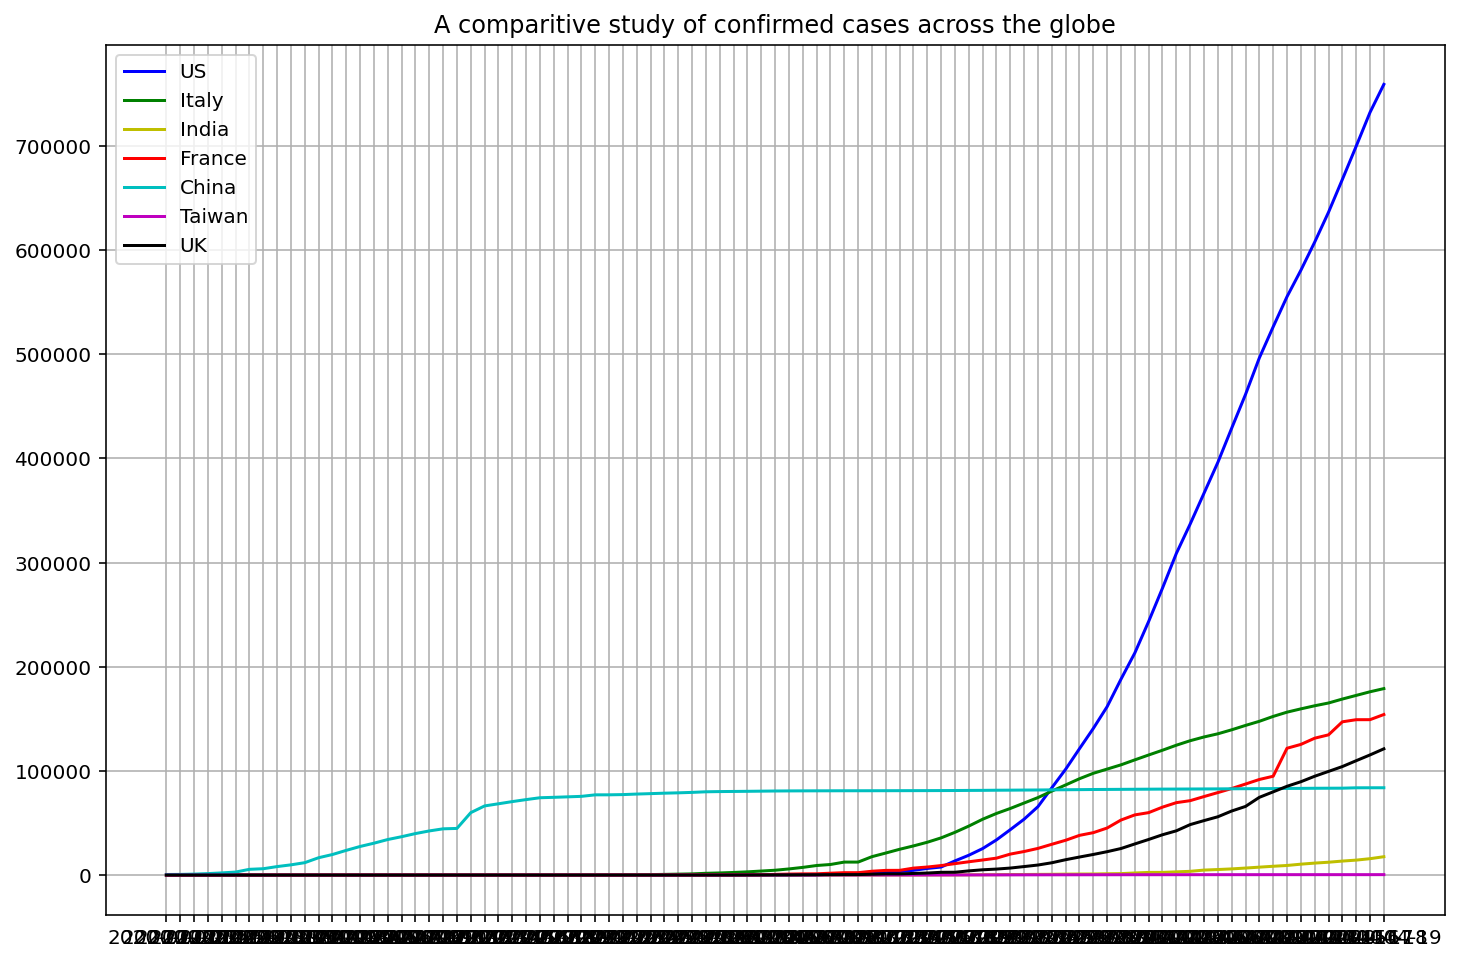

In [91]:
plt.figure(figsize = (12,8))
plt.plot(date, confirmed_cases_us, color = "b", label = "US")
plt.plot(date, confirmed_cases_italy, color = "g", label = "Italy")
plt.plot(date, confirmed_cases_india, color = "y", label = "India")
plt.plot(date, confirmed_cases_france, color = "r", label = "France")
plt.plot(date, confirmed_cases_china, color = "c", label = "China")
plt.plot(date, confirmed_cases_taiwan, color = "m", label = "Taiwan")
plt.plot(date, confirmed_cases_uk , color = "k", label = "UK")
plt.grid("both")
plt.title("A comparitive study of confirmed cases across the globe")
plt.legend()

plt.plot()

[]

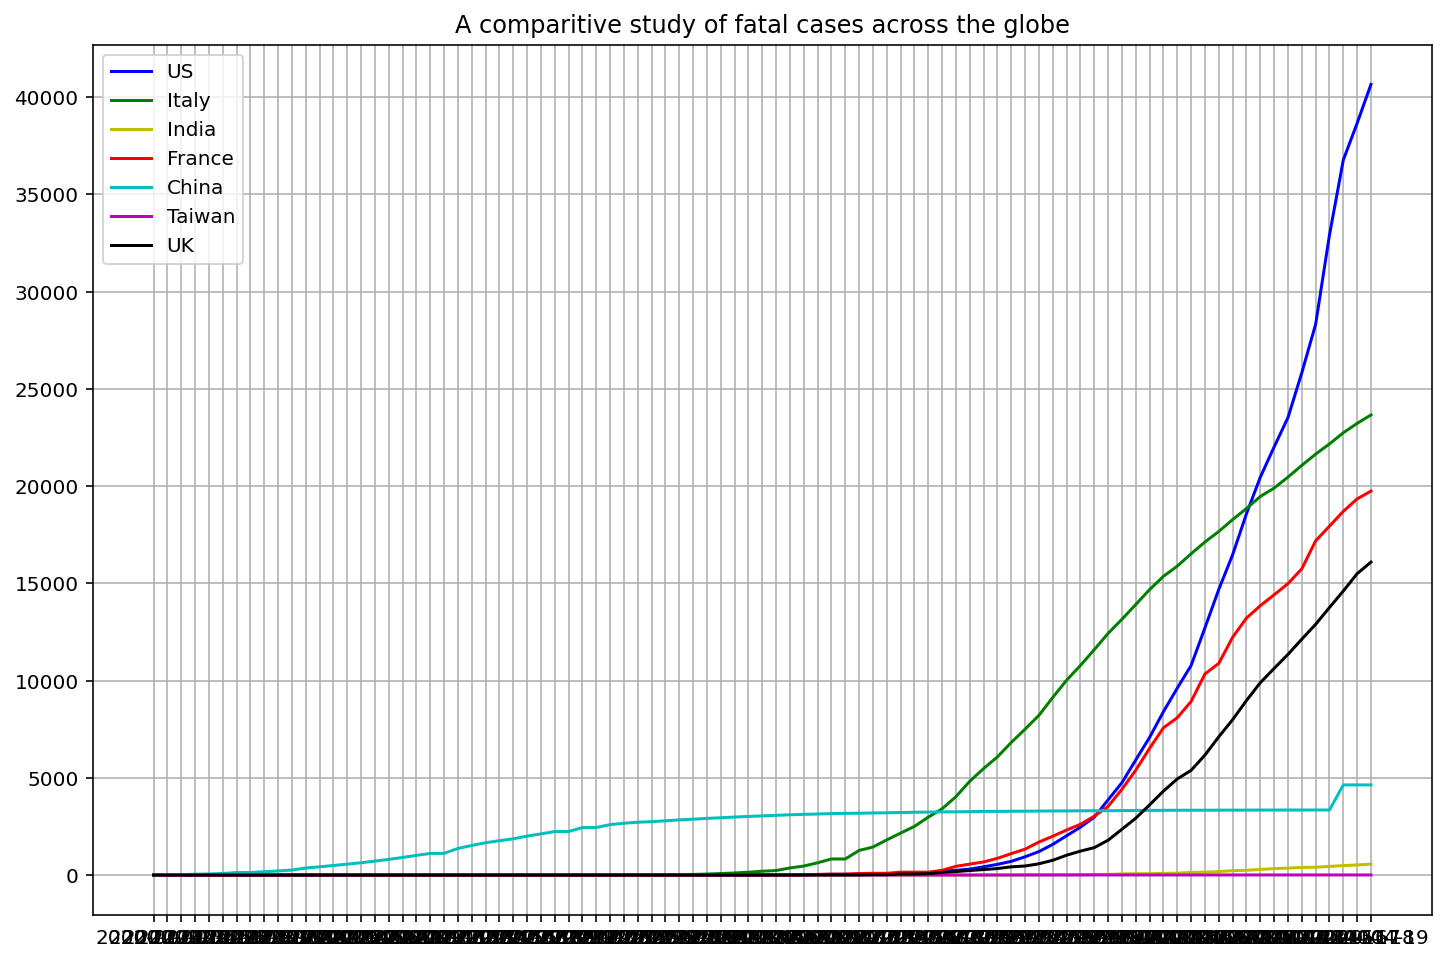

In [92]:
plt.figure(figsize = (12, 8))
plt.plot(date, fatal_cases_us, color = "b", label = "US")
plt.plot(date, fatal_cases_italy, color = "g", label = "Italy")
plt.plot(date, fatal_cases_india, color = "y", label = "India")
plt.plot(date, fatal_cases_france, color = "r", label = "France")
plt.plot(date, fatal_cases_china, color = "c", label = "China")
plt.plot(date, fatal_cases_taiwan, color = "m", label = "Taiwan")
plt.plot(date, fatal_cases_uk , color = "k", label = "UK")
plt.grid("both")
plt.title("A comparitive study of fatal cases across the globe")
plt.legend()

plt.plot()

In [0]:
train["Region"] = train["Country_Region"] + train["Province_State"]
train.drop(["Country_Region" , "Province_State"], axis = 1, inplace = True)

In [94]:
train.head()

,Id,Date,ConfirmedCases,Fatalities,Region
0,1,2020-01-22,0.0,0.0,Afghanistan
1,2,2020-01-23,0.0,0.0,Afghanistan
2,3,2020-01-24,0.0,0.0,Afghanistan
3,4,2020-01-25,0.0,0.0,Afghanistan
4,5,2020-01-26,0.0,0.0,Afghanistan


In [95]:
choro_map = px.choropleth(train, locations = "Region", locationmode = "country names", color = "ConfirmedCases",
                                        hover_name = "Region", animation_frame = "Date")
choro_map.update_layout(title_text = "Global Confirmed Cases", title_x = 0.5, 
                         geo = dict(showframe = False, showcoastlines = True))
choro_map.show()

In [96]:
choro_map = px.choropleth(train, locations = "Region", locationmode = "country names", color = "Fatalities",
                                        hover_name = "Region", animation_frame = "Date")
choro_map.update_layout(title_text = "Fatalities Across The Globe", title_x = 0.5, 
                         geo = dict(showframe = False, showcoastlines = True))
choro_map.show()

In [0]:
df = train

In [98]:
df_cc = df.pivot(index = "Region", columns = "Date", values ="ConfirmedCases")
df_cc.head()

Date,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-15,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,...,2020-03-11,2020-03-12,2020-03-13,2020-03-14,2020-03-15,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20,2020-03-21,2020-03-22,2020-03-23,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02,2020-04-03,2020-04-04,2020-04-05,2020-04-06,2020-04-07,2020-04-08,2020-04-09,2020-04-10,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15,2020-04-16,2020-04-17,2020-04-18,2020-04-19
Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,7.0,7.0,7.0,11.0,16.0,21.0,22.0,22.0,22.0,24.0,24.0,40.0,40.0,74.0,84.0,94.0,110.0,110.0,120.0,170.0,174.0,237.0,273.0,281.0,299.0,349.0,367.0,423.0,444.0,484.0,521.0,555.0,607.0,665.0,714.0,784.0,840.0,906.0,933.0,996.0
Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12.0,23.0,33.0,38.0,42.0,51.0,55.0,59.0,64.0,70.0,76.0,89.0,104.0,123.0,146.0,174.0,186.0,197.0,212.0,223.0,243.0,259.0,277.0,304.0,333.0,361.0,377.0,383.0,400.0,409.0,416.0,433.0,446.0,467.0,475.0,494.0,518.0,539.0,548.0,562.0
Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,20.0,24.0,26.0,37.0,48.0,54.0,60.0,74.0,87.0,90.0,139.0,201.0,230.0,264.0,302.0,367.0,409.0,454.0,511.0,584.0,716.0,847.0,986.0,1171.0,1251.0,1320.0,1423.0,1468.0,1572.0,1666.0,1761.0,1825.0,1914.0,1983.0,2070.0,2160.0,2268.0,2418.0,2534.0,2629.0
Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,2.0,39.0,39.0,53.0,75.0,88.0,113.0,133.0,164.0,188.0,224.0,267.0,308.0,334.0,370.0,376.0,390.0,428.0,439.0,466.0,501.0,525.0,545.0,564.0,583.0,601.0,601.0,638.0,646.0,659.0,673.0,673.0,696.0,704.0,713.0
Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,3.0,3.0,3.0,4.0,4.0,5.0,7.0,7.0,7.0,8.0,8.0,8.0,10.0,14.0,16.0,17.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,24.0,24.0


In [99]:
df_fc = df.pivot(index = "Region" , columns = "Date", values = "Fatalities")
df_fc.head()

Date,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-15,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,...,2020-03-11,2020-03-12,2020-03-13,2020-03-14,2020-03-15,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20,2020-03-21,2020-03-22,2020-03-23,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02,2020-04-03,2020-04-04,2020-04-05,2020-04-06,2020-04-07,2020-04-08,2020-04-09,2020-04-10,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15,2020-04-16,2020-04-17,2020-04-18,2020-04-19
Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,6.0,6.0,7.0,7.0,11.0,14.0,14.0,15.0,15.0,18.0,18.0,21.0,23.0,25.0,30.0,30.0,30.0,33.0
Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,4.0,5.0,5.0,6.0,8.0,10.0,10.0,11.0,15.0,15.0,16.0,17.0,20.0,20.0,21.0,22.0,22.0,23.0,23.0,23.0,23.0,23.0,24.0,25.0,26.0,26.0,26.0,26.0
Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,2.0,3.0,4.0,4.0,4.0,7.0,9.0,11.0,15.0,17.0,17.0,19.0,21.0,25.0,26.0,29.0,31.0,35.0,44.0,58.0,86.0,105.0,130.0,152.0,173.0,193.0,205.0,235.0,256.0,275.0,293.0,313.0,326.0,336.0,348.0,364.0,367.0,375.0
Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,3.0,3.0,3.0,6.0,8.0,12.0,14.0,15.0,16.0,17.0,18.0,21.0,22.0,23.0,25.0,26.0,26.0,29.0,29.0,31.0,33.0,33.0,35.0,35.0,36.0
Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0


In [0]:
df_cc.to_csv("confirmed_cases.csv", encoding = "utf-8-sig")
df_fc.to_csv("Fatal_cases.csv", encoding = "utf-8-sig")

# Analyzing Confirmed Cases

In [101]:
import IPython
url = "https://preview.flourish.studio/2028487/MSZ6a_Ik9B_0QweCuvJ6rs6D4N51xPsZwqIiymulW2sjdt_iKQcrLXrIG9d7HezS/"
iframe = '<iframe src=' + url + ' width=700 height=350></iframe>'
IPython.display.HTML(iframe)